In [2]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as pl
import matplotlib.ticker as tk

In [3]:
# Abbildung definieren (letzte Zeile muss mit 1 aufgefüllt werden)
P = np.array ([
    [1, 2, 2, 3, 3, 2, 2, 4, 4, 1, 1],
    [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])
print (P)

# Rotationswinkel (im Gradmass)
rot = 30

# Translation oder Rotationszentrum (0, 0 für Standard)
tl_x = -2
tl_y = 6

# Skalierung
s = 2 # Skalierungsfaktor

# Drehstreckung
ds = 1 # Kann für "nach vorne lehnen" auch negativ sein

# Drehstreckung mit Winkel
dss = 2 # Skalierungsfaktor der Drehstreckung
dw = 30 # Drehwinkel

# Achsenspiegelung horizontal/vertikal
h = False
v = True

# Achsenspiegelung mit Winkel
aw = 45 # Winkel der Spiegelachse

# Scherung
sx = 1
sy = 2

[[1 2 2 3 3 2 2 4 4 1 1]
 [1 1 2 2 3 3 4 4 5 5 1]
 [1 1 1 1 1 1 1 1 1 1 1]]


### Definition Methoden

In [4]:
# Translation
def tl(u,v):
    return np.array([
        [1,0,u],
        [0,1,v],
        [0,0,1]
    ])

# Rotation
def rt(phi):
    t = phi * np.pi / 180 # Vom Grad- ins Bogenmass
    c = np.cos(t)
    s = np.sin(t)
    return np.array([
        [c, -s, 0],
        [s,  c, 0],
        [0,  0, 1]
    ])

# Skalierung
def sk(s):
    return np.array([
        [s ,0, 0],
        [0 ,s, 0],
        [0, 0, s]
    ])

# Drehstreckung
def drst(ds):
    return np.array([
        [1  , -ds, 0],
        [ds, 1 , 0],
        [0  , 0 , 1]
    ])

# Drehstreckung mit Winkel
def drstw(ds, dw):
    t = dw * np.pi / 180 # Vom Grad- ins Bogenmass
    c = ds * np.cos(t)
    s = ds * np.sin(t)
    return np.array([
        [c , -s, 0],
        [s , c , 0],
        [0 , 0 , 1]
    ])

# Achsenspiegelung
def acs(h, v):
    h = 1-2*h
    v = 1-2*v

    return np.array([
        [v, 0, 0],
        [0, h ,0],
        [0, 0 ,0]
    ])

# Achsenspiegelung mit Winkel
def acw(aw):
    t = aw * np.pi / 180 # Vom Grad- ins Bogenmass
    c = np.cos(2 * t)
    s = np.sin(2 * t)
    return np.array([
        [c , s, 0],
        [s , -c , 0],
        [0 , 0 , 1]
    ])

# Scherung
def sch(sx, sy):
    return np.array([
        [1 , sx, 0],
        [sy, 1 , 0],
        [0 , 0 , 1]
    ])

### Plot Rotation

[[ 1  0 -2]
 [ 0  1  6]
 [ 0  0  1]]
[[ 1.  0.  2.]
 [ 0.  1. -6.]
 [ 0.  0.  1.]]


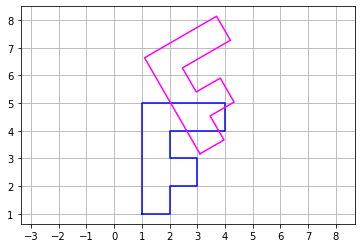

In [5]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

T = tl(tl_x, tl_y)y
R = rt(rot)
Q = T @ R @ la.inv(T) @ P # Zuerst verschieben, dann um den 0 Punkt rotieren und wieder zurück verschieben (inverse der Translationsmatrix)
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Translation

[[1 2 2 3 3 2 2 4 4 1 1]
 [1 1 2 2 3 3 4 4 5 5 1]
 [1 1 1 1 1 1 1 1 1 1 1]]
[[-1  0  0  1  1  0  0  2  2 -1 -1]
 [ 7  7  8  8  9  9 10 10 11 11  7]
 [ 1  1  1  1  1  1  1  1  1  1  1]]


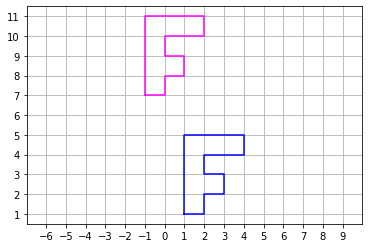

In [6]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

T = tl(tl_x, tl_y)
Q = T @ P
print(P)
print(Q)
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Skalierung

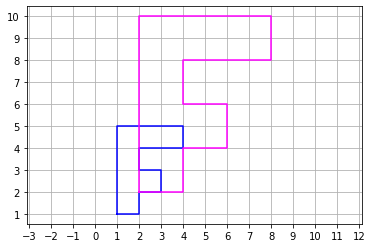

In [7]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

S = sk(s)
Q = S @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Plot Drehstreckung

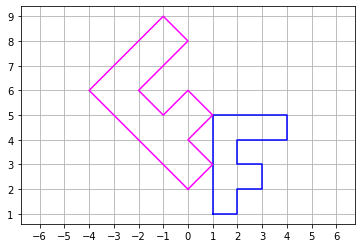

In [8]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

D = drst(ds)
Q = D @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Drehstreckung mit Winkel

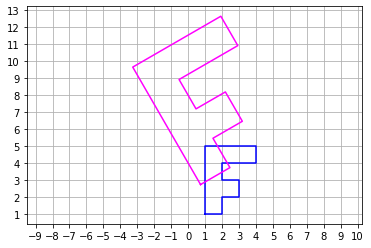

In [9]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

D = drstw(dss,dw)
Q = D @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Achsenspiegelung

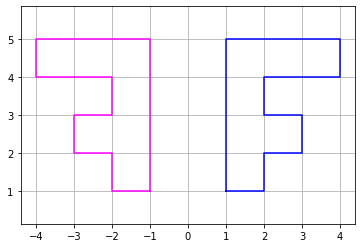

In [10]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

A = acs(h,v)
Q = A @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Achsenspiegelung mit Winkel

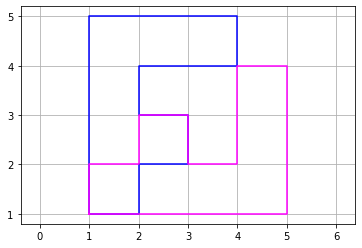

In [11]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

A = acw(aw)
Q = A @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')

### Scherung

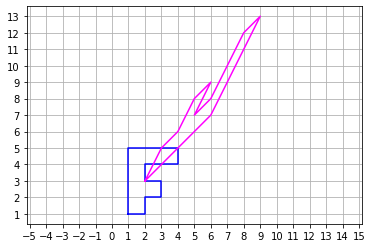

In [12]:
axs = pl.axes()
axs.axis ('equal')
axs.xaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.yaxis.set_major_locator (tk.MultipleLocator (1.0))
axs.grid()

S = sch(sx, sy)
Q = S @ P
pl.plot (P [0, :], P [1, :], 'blue')
pl.plot (Q [0, :], Q [1, :], 'magenta')